In [6]:
import pandas as pd
import matplotlib.pyplot as plt

annotations = pd.read_csv('/Users/jason/Desktop/630 Final Project/data/annotations.csv')
comments = pd.read_csv('/Users/jason/Desktop/630 Final Project/data/comments.csv')
spans = pd.read_csv('/Users/jason/Desktop/630 Final Project/data/spans.csv')

print("Annotations Data:")
print(annotations.head(), "\n")

print("Comments Data:")
print(comments.head(), "\n")

print("Spans Data:")
print(spans.head())


Annotations Data:
   annotation  comment_id  worker country  all toxic  not toxic
0           0     5167187     868     USA      False      False
1           1     5167187    1316     USA      False      False
2           2     5167187    1295     USA      False       True
3           3     5167187    2856     USA      False      False
4           4     5521110     418     VEN       True       True 

Comments Data:
   comment_id                                       comment_text
0      239607  Yet call out all Muslims for the acts of a few...
1      239612  This bitch is nuts. Who would read a book by a...
2      240311                                   You're an idiot.
3      240400  Nincompoop, that's a nice one! I'm partial to ...
4      240461  testing purposes: \n\nyou are an idiot and i c... 

Spans Data:
   annotation    type  start  end
0           0  Insult    133  139
1           1  Insult     84   92
2           1  Insult    118  124
3           1  Insult    126  131
4      

In [7]:
print("Annotations Info:")
print(annotations.info(), "\n")

print("Comments Info:")
print(comments.info(), "\n")

print("Spans Info:")
print(spans.info())


Annotations Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59215 entries, 0 to 59214
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   annotation  59215 non-null  int64 
 1   comment_id  59215 non-null  int64 
 2   worker      59215 non-null  int64 
 3   country     59215 non-null  object
 4   all toxic   59215 non-null  bool  
 5   not toxic   59215 non-null  bool  
dtypes: bool(2), int64(3), object(1)
memory usage: 1.9+ MB
None 

Comments Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    16100 non-null  int64 
 1   comment_text  16100 non-null  object
dtypes: int64(1), object(1)
memory usage: 251.7+ KB
None 

Spans Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46784 entries, 0 to 46783
Data columns (total 4 columns):
 #   Column      N

Comment Length Statistics:
count    16100.000000
mean       208.720186
std        204.790626
min          3.000000
25%         72.000000
50%        139.000000
75%        270.000000
max       1000.000000
Name: length, dtype: float64


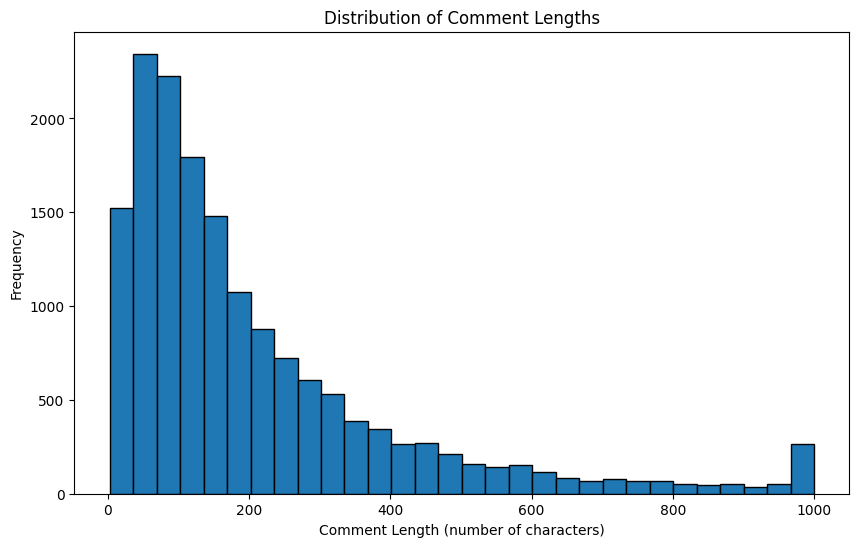

In [8]:
comments['length'] = comments['comment_text'].apply(len)


print("Comment Length Statistics:")
print(comments['length'].describe())

plt.figure(figsize=(10,6))
plt.hist(comments['length'], bins=30, edgecolor='k')
plt.xlabel('Comment Length (number of characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()


Toxic Span Length Statistics:
count    46784.000000
mean        14.522080
std         39.196018
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        998.000000
Name: span_length, dtype: float64


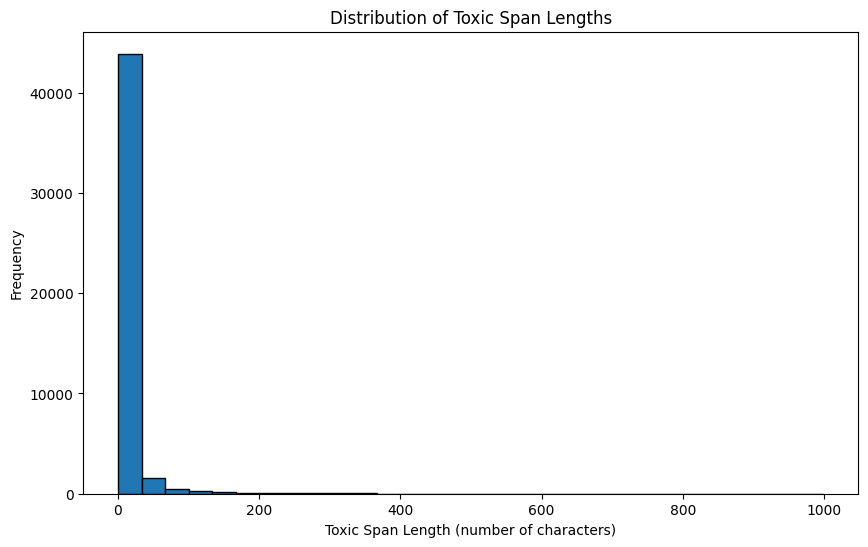

In [9]:
spans['span_length'] = spans['end'] - spans['start']

print("Toxic Span Length Statistics:")
print(spans['span_length'].describe())

plt.figure(figsize=(10,6))
plt.hist(spans['span_length'], bins=30, edgecolor='k')
plt.xlabel('Toxic Span Length (number of characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Toxic Span Lengths')
plt.show()


Toxic Spans per Comment Statistics:
count    15499.000000
mean         3.018517
std          2.432701
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max        211.000000
dtype: float64


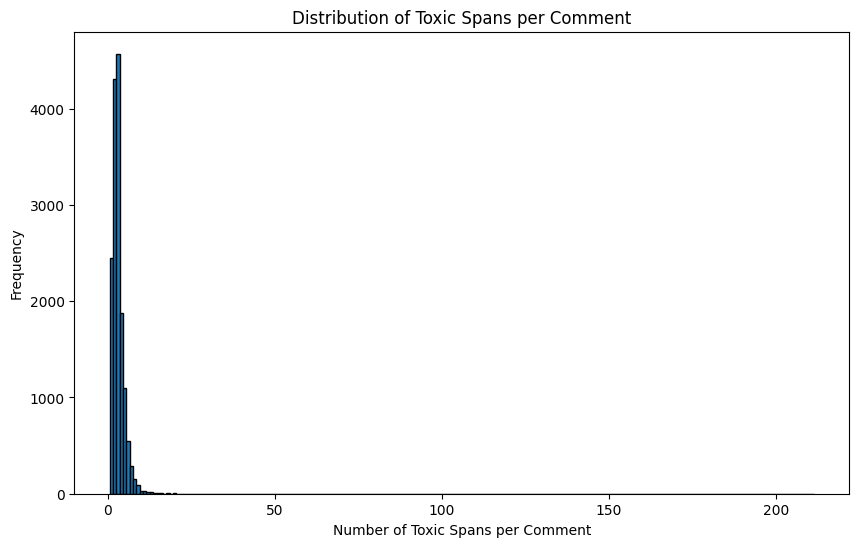

In [10]:
spans_merged = pd.merge(spans, annotations[['annotation', 'comment_id']], on='annotation', how='left')
spans_per_comment = spans_merged.groupby('comment_id').size()

print("Toxic Spans per Comment Statistics:")
print(spans_per_comment.describe())

plt.figure(figsize=(10,6))
plt.hist(spans_per_comment, bins=range(1, spans_per_comment.max()+2), align='left', edgecolor='k')
plt.xlabel('Number of Toxic Spans per Comment')
plt.ylabel('Frequency')
plt.title('Distribution of Toxic Spans per Comment')
plt.show()


In [11]:

merged_df = pd.merge(spans, annotations, on='annotation', how='left')
merged_df = pd.merge(merged_df, comments, on='comment_id', how='left')

print("Merged DataFrame:")
merged_df.head(25)


Merged DataFrame:


,annotation,type,start,end,span_length,comment_id,worker,country,all toxic,not toxic,comment_text,length
0,0,Insult,133,139,6,5167187,868,USA,False,False,That's right. They are not normal. And I am st...,156
1,1,Insult,84,92,8,5167187,1316,USA,False,False,That's right. They are not normal. And I am st...,156
2,1,Insult,118,124,6,5167187,1316,USA,False,False,That's right. They are not normal. And I am st...,156
3,1,Insult,126,131,5,5167187,1316,USA,False,False,That's right. They are not normal. And I am st...,156
4,1,Insult,133,147,14,5167187,1316,USA,False,False,That's right. They are not normal. And I am st...,156
5,2,Identity based Attack,118,131,13,5167187,1295,USA,False,True,That's right. They are not normal. And I am st...,156
6,2,Insult,133,147,14,5167187,1295,USA,False,True,That's right. They are not normal. And I am st...,156
7,3,Insult,84,92,8,5167187,2856,USA,False,False,That's right. They are not normal. And I am st...,156
8,5,Identity based Attack,38,49,11,5521110,2076,USA,False,False,"yep, this crap sounds like its from a libertarian",49
9,5,Insult,10,14,4,5521110,2076,USA,False,False,"yep, this crap sounds like its from a libertarian",49


In [12]:
import re
import string

def normalize_text(text):

    text = text.lower()
    text = re.sub(r'['+re.escape(string.punctuation)+']', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

merged_df['normalized_comment'] = merged_df['comment_text'].apply(normalize_text)

merged_df[['comment_text', 'normalized_comment']].head(25)


,comment_text,normalized_comment
0,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
1,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
2,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
3,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
4,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
5,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
6,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
7,That's right. They are not normal. And I am st...,thats right they are not normal and i am start...
8,"yep, this crap sounds like its from a libertarian",yep this crap sounds like its from a libertarian
9,"yep, this crap sounds like its from a libertarian",yep this crap sounds like its from a libertarian


In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize_and_label(comment, toxic_spans):
    """
    Tokenizes the comment text and assigns a toxic (1) or non-toxic (0) label to each token.
    A token is labeled toxic if any part of it overlaps with any toxic span.
    
    Parameters:
    - comment (str): The original comment text.
    - toxic_spans (list of tuples): Each tuple is (start, end) representing a toxic span.
    
    Returns:
    - tokens (list of str): The tokenized words.
    - token_labels (list of int): Binary labels for each token.
    """
    doc = nlp(comment)
    tokens = [token.text for token in doc]
    token_offsets = [(token.idx, token.idx + len(token)) for token in doc]
    
    token_labels = []
    for start_t, end_t in token_offsets:
        label = 0
        for toxic_start, toxic_end in toxic_spans:

            if toxic_start < end_t and toxic_end > start_t:
                label = 1
                break
        token_labels.append(label)
    return tokens, token_labels

token_data = []
for comment_id, group in merged_df.groupby("comment_id"):
    comment_text = group["comment_text"].iloc[0]
    toxic_spans = list(group[["start", "end"]].drop_duplicates().itertuples(index=False, name=None))
    tokens, labels = tokenize_and_label(comment_text, toxic_spans)
    
    token_data.append({
        "comment_id": comment_id,
        "comment_text": comment_text,
        "tokens": tokens,
        "labels": labels
    })

tokenized_df = pd.DataFrame(token_data)

print(tokenized_df.head())


   comment_id                                       comment_text  \
0      239607  Yet call out all Muslims for the acts of a few...   
1      239612  This bitch is nuts. Who would read a book by a...   
2      240311                                   You're an idiot.   
3      240400  Nincompoop, that's a nice one! I'm partial to ...   
4      240461  testing purposes: \n\nyou are an idiot and i c...   

                                              tokens  \
0  [Yet, call, out, all, Muslims, for, the, acts,...   
1  [This, bitch, is, nuts, ., Who, would, read, a...   
2                           [You, 're, an, idiot, .]   
3  [Nincompoop, ,, that, 's, a, nice, one, !, I, ...   
4  [testing, purposes, :, \n\n, you, are, an, idi...   

                                              labels  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]  
2                                    [0, 0, 0, 1, 0]  
3      [1, 0, 1, 1, 0, 0, 0, 0, 0,

This code accomplishes the following:

• It tokenizes each comment using spaCy, which provides token boundaries via character offsets.
• For each token, it checks if there is any overlap with any toxic span associated with that comment and assigns a label accordingly.
• Finally, it stores the results in a new DataFrame (tokenized_df) with columns for the comment ID, original comment text, list of tokens, and their corresponding toxic labels.

This will allow you to later train models that work at the token level while retaining the toxic span information.

In [14]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def tokenize_and_convert_labels(comment_text, toxic_spans):
    doc = nlp(comment_text)
    tokens = [token.text for token in doc]
    token_offsets = [(token.idx, token.idx + len(token)) for token in doc]
    
    labels = []
    for token_start, token_end in token_offsets:
        label = 0
        for span_start, span_end in toxic_spans:
            if token_start < span_end and token_end > span_start:
                label = 1
                break
        labels.append(label)
    
    return tokens, labels

tokenized_data = []
for comment_id, group in merged_df.groupby("comment_id"):
    comment_text = group["comment_text"].iloc[0]
    toxic_spans = list(group[["start", "end"]].drop_duplicates().itertuples(index=False, name=None))
    
    tokens, token_labels = tokenize_and_convert_labels(comment_text, toxic_spans)
    
    tokenized_data.append({
        "comment_id": comment_id,
        "comment_text": comment_text,
        "tokens": tokens,
        "token_labels": token_labels
    })

tokenized_df = pd.DataFrame(tokenized_data)
print(tokenized_df.head())


   comment_id                                       comment_text  \
0      239607  Yet call out all Muslims for the acts of a few...   
1      239612  This bitch is nuts. Who would read a book by a...   
2      240311                                   You're an idiot.   
3      240400  Nincompoop, that's a nice one! I'm partial to ...   
4      240461  testing purposes: \n\nyou are an idiot and i c...   

                                              tokens  \
0  [Yet, call, out, all, Muslims, for, the, acts,...   
1  [This, bitch, is, nuts, ., Who, would, read, a...   
2                           [You, 're, an, idiot, .]   
3  [Nincompoop, ,, that, 's, a, nice, one, !, I, ...   
4  [testing, purposes, :, \n\n, you, are, an, idi...   

                                        token_labels  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]  
2                                    [0, 0, 0, 1, 0]  
3      [1, 0, 1, 1, 0, 0, 0, 0, 0,

This cell does the following:

Loads spaCy and defines a helper function that tokenizes a comment and assigns a token-level label based on overlapping character spans.

Groups your merged DataFrame by comment, collects toxic spans per comment, and applies the function to produce tokens and labels.

Creates a new DataFrame (tokenized_df) where each row contains a comment's ID, original text, token list, and corresponding token-level labels.

This setup is ready for model training where you'll use the tokens and token-level labels as inputs and targets.